# Notebook de modèles neuronaux pour carnivores


**Librairies**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing import image
import matplotlib.pyplot as plt
import time

**Versions de librairies**

In [2]:
import sys
print(f"Python {sys.version}")
print(f"TensorFlow Version: {tf.__version__}")
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Python 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
TensorFlow Version: 2.15.0
Num GPUs Available:  0


**Lecture des données**

In [ ]:
base_dir = "path/animaux"
import os
train_dir = os.path.join(base_dir,"training_set")
test_dir = os.path.join(base_dir,"test_set")

In [4]:
# échantillons d'apprentissage et de validation

img_rows = 400
img_cols = 400
input_shape = (img_rows, img_cols, 3)
image_size = (img_rows, img_cols)
batch_size = 64

x_train = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True,
)

x_test = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=False,
)

print(x_train.class_names)
print(x_test.class_names)

Found 7172 files belonging to 6 classes.
Found 818 files belonging to 6 classes.
['chat', 'cheetah', 'fox', 'hyena', 'lion', 'tiger']
['chat', 'cheetah', 'fox', 'hyena', 'lion', 'tiger']


**Visualisation des données**

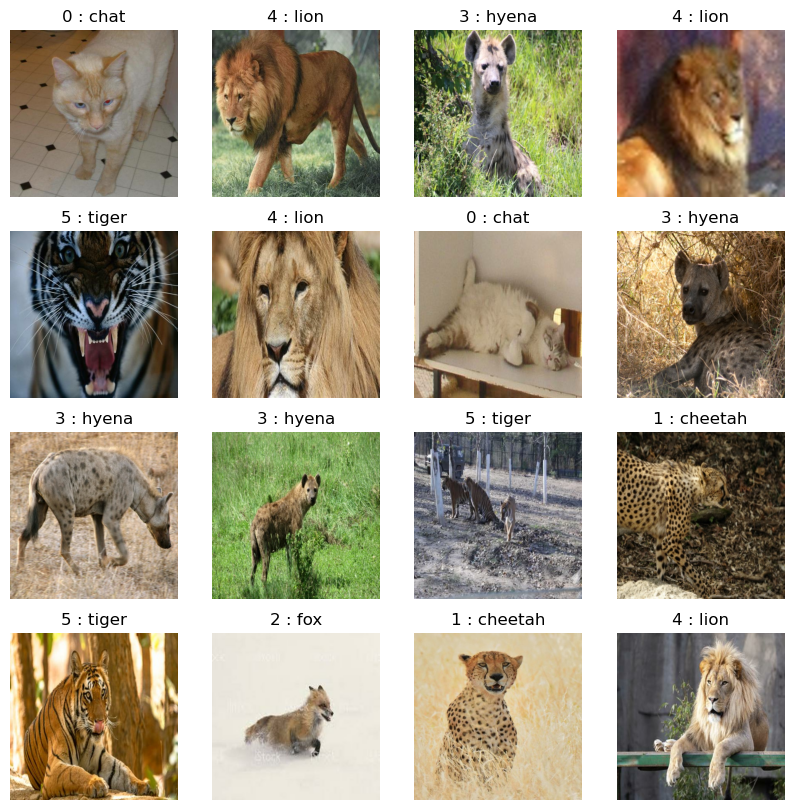

In [5]:
import matplotlib.pyplot as plt
class_names = x_train.class_names

plt.figure(figsize=(10, 10))
#images du premier batch d'images
for images, labels in x_train.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(X = images[i].numpy().astype("uint8"))
        plt.title(str(int(labels[i]))+" : "+str(class_names[labels[i]]))
        plt.axis("off")

## Sans augmentation de données

### Modèle séquentiel Keras à 2 couches de convolution avec dropout

**Création du modèle**

In [10]:
model_2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Rescaling(1./255),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(32, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(6, activation="softmax"),
    ]
)

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 400, 400, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 398, 398, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 199, 199, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 197, 197, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 98, 98, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 307328)           

9 millions de paramètres

**Aprentissage du modèle**

In [12]:
model_2.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.RMSprop(learning_rate=1e-3), metrics=["accuracy"])
history=model_2.fit(x_train, validation_data=(x_test), batch_size=64, epochs=20)

Epoch 1/20
113/113 [==============================] - 25s 201ms/step - loss: 1.8450 - accuracy: 0.2083 - val_loss: 1.6317 - val_accuracy: 0.2861
Epoch 2/20
113/113 [==============================] - 23s 201ms/step - loss: 1.6091 - accuracy: 0.3426 - val_loss: 1.8620 - val_accuracy: 0.2665
Epoch 3/20
113/113 [==============================] - 23s 199ms/step - loss: 1.4530 - accuracy: 0.4451 - val_loss: 1.5124 - val_accuracy: 0.3790
Epoch 4/20
113/113 [==============================] - 23s 201ms/step - loss: 1.2789 - accuracy: 0.5191 - val_loss: 1.2871 - val_accuracy: 0.4951
Epoch 5/20
113/113 [==============================] - 23s 200ms/step - loss: 1.1218 - accuracy: 0.5798 - val_loss: 1.6122 - val_accuracy: 0.4829
Epoch 6/20
113/113 [==============================] - 23s 201ms/step - loss: 0.9758 - accuracy: 0.6368 - val_loss: 1.6252 - val_accuracy: 0.4523
Epoch 7/20
113/113 [==============================] - 24s 202ms/step - loss: 0.8447 - accuracy: 0.6882 - val_loss: 1.2914 - val_ac

64% d'accuracy

**Evaluation du modèle**

In [ ]:
loss, acc = model_2.evaluate(x_test, verbose=0)
print("Test loss: %.5f" % loss)
print("Test accuracy: %.2f%%" % (100.0 * acc))
print("Error rate: %.2f%%" % (100.0 * (1-acc)))

**Visualisation des performances**

In [ ]:
def plot_hist_acc(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("Training Progress")
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.legend(["train_acc", "val_acc"], loc="upper left")
    plt.show()
def plot_hist_loss(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("Training Progress")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend(["train_loss", "val_loss"], loc="upper left")
    plt.show()

plot_hist_acc(history)
plot_hist_loss(history)

**Prédictions**

In [ ]:
predictions = (model_2.predict(x_test) > 0.5).astype("int32")
test_labels = np.concatenate([y for x,y in x_test], axis=0) 

import pandas as pd
pd.crosstab(test_labels, np.argmax(predictions, axis=1), margins=True, margins_name="Total" )

### Modèle séquentiel Keras à 3 couches de convolution avec dropout

In [6]:
model_3 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Rescaling(1./255),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(32, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(6, activation="softmax"),
    ]
)

model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 400, 400, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 398, 398, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 199, 199, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 197, 197, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 98, 98, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 32)        9

On a plus de 2 millions de paramètres

**Apprentissage du modèle**

In [7]:
model_3.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.RMSprop(learning_rate=1e-3), metrics=["accuracy"])
history=model_3.fit(x_train, validation_data=(x_test), batch_size=64, epochs=20)

Epoch 1/20
113/113 [==============================] - 35s 229ms/step - loss: 1.9113 - accuracy: 0.2345 - val_loss: 1.7317 - val_accuracy: 0.2335
Epoch 2/20
113/113 [==============================] - 24s 208ms/step - loss: 1.5703 - accuracy: 0.3625 - val_loss: 1.6685 - val_accuracy: 0.2824
Epoch 3/20
113/113 [==============================] - 24s 211ms/step - loss: 1.4014 - accuracy: 0.4406 - val_loss: 1.3601 - val_accuracy: 0.4303
Epoch 4/20
113/113 [==============================] - 25s 212ms/step - loss: 1.2661 - accuracy: 0.5029 - val_loss: 1.7824 - val_accuracy: 0.3619
Epoch 5/20
113/113 [==============================] - 24s 210ms/step - loss: 1.1892 - accuracy: 0.5378 - val_loss: 1.9802 - val_accuracy: 0.4181
Epoch 6/20
113/113 [==============================] - 25s 211ms/step - loss: 1.0951 - accuracy: 0.5625 - val_loss: 1.5214 - val_accuracy: 0.5183
Epoch 7/20
113/113 [==============================] - 25s 212ms/step - loss: 1.0086 - accuracy: 0.5968 - val_loss: 1.1060 - val_ac

72,37% d'accuracy

**Evaluation du modèle**

In [8]:
loss, acc = model_3.evaluate(x_test, verbose=0)
print("Test loss: %.5f" % loss)
print("Test accuracy: %.2f%%" % (100.0 * acc))
print("Error rate: %.2f%%" % (100.0 * (1-acc)))

Test loss: 1.52379
Test accuracy: 66.14%
Error rate: 33.86%


**Visualisation des performances**

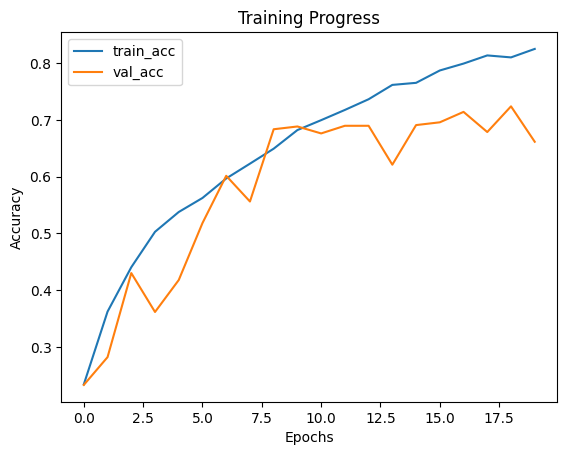

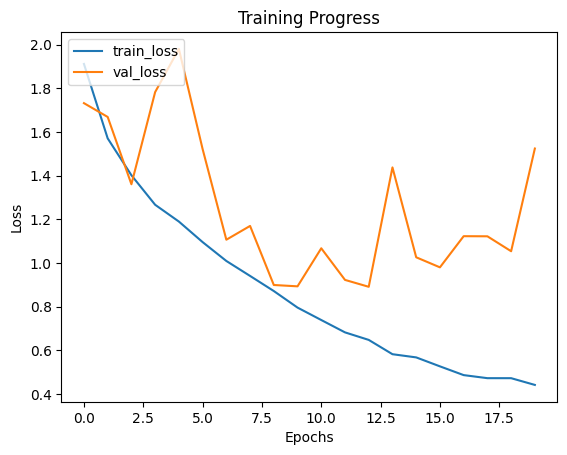

In [9]:
def plot_hist_acc(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("Training Progress")
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.legend(["train_acc", "val_acc"], loc="upper left")
    plt.show()
def plot_hist_loss(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("Training Progress")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend(["train_loss", "val_loss"], loc="upper left")
    plt.show()

plot_hist_acc(history)
plot_hist_loss(history)


**Prédictions**

In [10]:
predictions = (model_3.predict(x_test) > 0.5).astype("int32")
test_labels = np.concatenate([y for x,y in x_test], axis=0) 

import pandas as pd
pd.crosstab(test_labels, np.argmax(predictions, axis=1), margins=True, margins_name="Total" )

13/13 [==============================] - 2s 119ms/step


col_0    0    1   2    3    4   5  Total
row_0                                   
0       80    1   5   13   21   0    120
1        2  132   3    5    8   1    151
2        9    1  70   21   30   2    133
3       25   12   5   66   43   1    152
4        8    1   7    3  114   2    135
5        2   27   3    6    1  88    127
Total  126  174  93  114  217  94    818

Nos prédiction sont assez mauvaise et on peut observer qu'il a du mal avec les hyènes

**Avec early stopping**

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.RMSprop(learning_rate=1e-3), metrics=["accuracy"])
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10,  restore_best_weights=True)
history=model.fit(x_train, validation_data=x_test, batch_size=64, epochs=50, callbacks=[es])

Epoch 1/50
113/113 [==============================] - 26s 217ms/step - loss: 0.2848 - accuracy: 0.8900 - val_loss: 2.2831 - val_accuracy: 0.6406
Epoch 2/50
113/113 [==============================] - 25s 214ms/step - loss: 0.2571 - accuracy: 0.9009 - val_loss: 1.4278 - val_accuracy: 0.7066
Epoch 3/50
113/113 [==============================] - 25s 212ms/step - loss: 0.2610 - accuracy: 0.9006 - val_loss: 1.3041 - val_accuracy: 0.7054
Epoch 4/50
113/113 [==============================] - 25s 214ms/step - loss: 0.2367 - accuracy: 0.9095 - val_loss: 1.3394 - val_accuracy: 0.7311
Epoch 5/50
113/113 [==============================] - 25s 215ms/step - loss: 0.2455 - accuracy: 0.9088 - val_loss: 1.4379 - val_accuracy: 0.7127
Epoch 6/50
113/113 [==============================] - 25s 212ms/step - loss: 0.2433 - accuracy: 0.9083 - val_loss: 1.4668 - val_accuracy: 0.7311
Epoch 7/50
113/113 [==============================] - 25s 213ms/step - loss: 0.2333 - accuracy: 0.9127 - val_loss: 1.4158 - val_ac

Nous pouvons confirmé les performances de notre algorithme car l'on obtient les mêmes résultats

### AutoML avec optuna

In [12]:
import optuna
import logging

def create_model(trial):
    n_hidden = trial.suggest_int('n_hidden', 1, 2)
    n_units = trial.suggest_categorical('n_units', [32, 64, 128])
    ksize = trial.suggest_categorical('ksize', [3, 5])
    learning_rate = trial.suggest_categorical('learning_rate', [1e-5])

    model = keras.Sequential()
    model.add(layers.Conv2D(input_shape=input_shape, filters=n_units, kernel_size=(ksize,ksize),
                      activation=trial.suggest_categorical('activation', ["relu"])))
    model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    for i in range(n_hidden):
        model.add(layers.Conv2D(filters=n_units, kernel_size=(ksize,ksize), padding="same",
                      activation=trial.suggest_categorical('activation', ["relu"])))
        model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(rate=trial.suggest_float('rate', 0.2, 0.5)))
    model.add(layers.Dense(6, activation='softmax'))
    
    optimizer_name = trial.suggest_categorical('optimizer', ["rmsprop"])
    if optimizer_name == 'rmsprop':
        optimiser = keras.optimizers.RMSprop(learning_rate=learning_rate)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimiser, metrics=["accuracy"])
    return model

def objective(trial):   
    model = create_model(trial)
    batch_size = trial.suggest_categorical('batch_size', [64])
    model.fit(x_train, validation_data=x_test, shuffle=True, batch_size=batch_size, epochs=10, verbose=False)
    score = model.evaluate(x_test, verbose=0)
    return score[1]

optuna.logging.get_logger("optuna").addHandler(logging.StreamHandler(sys.stdout))
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(), pruner=optuna.pruners.MedianPruner(n_warmup_steps=10))
start_time = time.time()
study.optimize(objective, timeout=1800, show_progress_bar = True, gc_after_trial=True)
print("\nTemps de calcul :", time.time() - start_time)
print('\nNumber of finished trials:', len(study.trials)) 
print('\nBest trial:', study.best_trial)
#print('\nBest parameters:', study.best_trial.params)
print('\nMetric value:', study.best_trial.value)
print('\nBest parameters: ')
for key, value in study.best_trial.params.items():
    print("  {} = {}".format(key,value))

NameError: name 'optuna' is not defined

L'optimisation avec optuna n'est pas réellement pertinente car l'on test très peu de modèle en beaucoup de temps (10 minutes par modèle)

### Modèle séquentiel Keras à 4 couches de convolution avec dropout

**Création du modèle**

In [5]:
model_4 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Rescaling(1./255),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(32, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(6, activation="softmax"),
    ]
)

model_4.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 400, 400, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 398, 398, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 199, 199, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 197, 197, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 98, 98, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 32)       

**Aprentissage du modèle**

In [6]:
model_4.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.RMSprop(learning_rate=1e-3), metrics=["accuracy"])
history=model_4.fit(x_train, validation_data=(x_test), batch_size=64, epochs=20)

Epoch 1/20




113/113 [==============================] - 219s 2s/step - loss: 1.8151 - accuracy: 0.1885 - val_loss: 1.7906 - val_accuracy: 0.1528
Epoch 2/20
113/113 [==============================] - 245s 2s/step - loss: 1.6930 - accuracy: 0.2511 - val_loss: 1.5963 - val_accuracy: 0.3215
Epoch 3/20
113/113 [==============================] - 264s 2s/step - loss: 1.5298 - accuracy: 0.3440 - val_loss: 1.3669 - val_accuracy: 0.4768
Epoch 4/20
113/113 [==============================] - 231s 2s/step - loss: 1.4221 - accuracy: 0.4159 - val_loss: 1.4506 - val_accuracy: 0.4242
Epoch 5/20
113/113 [==============================] - 233s 2s/step - loss: 1.3362 - accuracy: 0.4600 - val_loss: 1.2832 - val_accuracy: 0.5196
Epoch 6/20
113/113 [==============================] - 234s 2s/step - loss: 1.2579 - accuracy: 0.5015 - val_loss: 1.1536 - val_accuracy: 0.5526
Epoch 7/20
113/113 [==============================] - 229s 2s/step - loss: 1.1772 - accuracy: 0.5413 - val_loss: 1.0222 - val_accuracy: 0.6369
Epoch 8/

76,16% d'accuracy

**Evaluation du modèle**

In [7]:
loss, acc = model_4.evaluate(x_test, verbose=0)
print("Test loss: %.5f" % loss)
print("Test accuracy: %.2f%%" % (100.0 * acc))
print("Error rate: %.2f%%" % (100.0 * (1-acc)))

Test loss: 0.79022
Test accuracy: 72.00%
Error rate: 28.00%


**Visualisation des performances**

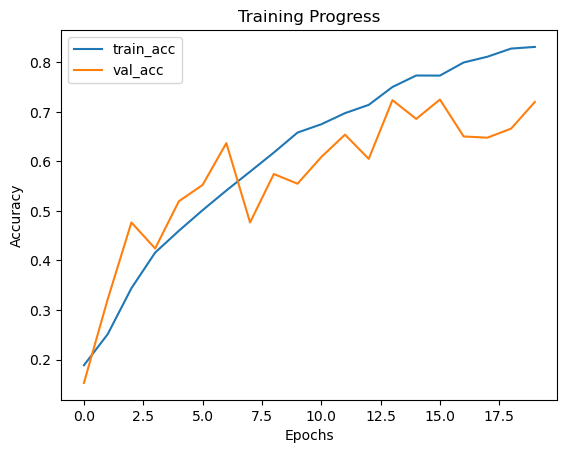

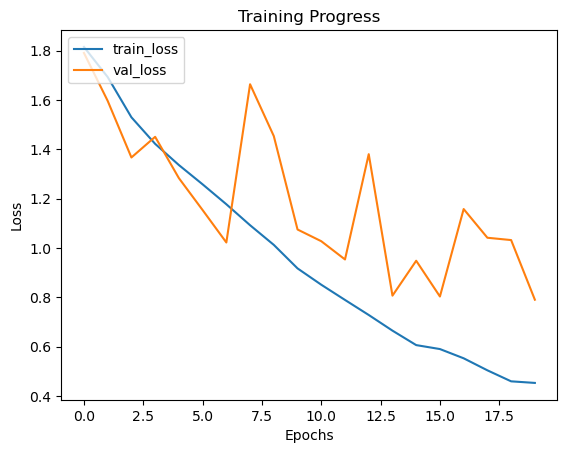

In [8]:
def plot_hist_acc(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("Training Progress")
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.legend(["train_acc", "val_acc"], loc="upper left")
    plt.show()
def plot_hist_loss(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("Training Progress")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend(["train_loss", "val_loss"], loc="upper left")
    plt.show()

plot_hist_acc(history)
plot_hist_loss(history)

**Prédictions**

In [9]:
predictions = (model_4.predict(x_test) > 0.5).astype("int32")
test_labels = np.concatenate([y for x,y in x_test], axis=0) 

import pandas as pd
pd.crosstab(test_labels, np.argmax(predictions, axis=1), margins=True, margins_name="Total" )

13/13 [==============================] - 8s 538ms/step


col_0    0    1    2    3   4   5  Total
row_0                                   
0       96    0    7   12   4   1    120
1       30  112    2    6   0   1    151
2       33    0   87    9   4   0    133
3       74    0    6   67   5   0    152
4       63    0    9    4  55   4    135
5       32    0    0    3   2  90    127
Total  328  112  111  101  70  96    818

### Modèle séquentiel Keras à 5 couches de convolution et dropout

**Création du modèle**

In [7]:
model_5 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Rescaling(1./255),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(32, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(6, activation="softmax"),
    ]
)

model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 400, 400, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 398, 398, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 199, 199, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 197, 197, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 98, 98, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 32)        9

**Aprentissage du modèle**

In [8]:
model_5.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.RMSprop(learning_rate=1e-3), metrics=["accuracy"])
history=model_5.fit(x_train, validation_data=(x_test), batch_size=64, epochs=20)

Epoch 1/20
113/113 [==============================] - 35s 239ms/step - loss: 1.7341 - accuracy: 0.2401 - val_loss: 1.6284 - val_accuracy: 0.3215
Epoch 2/20
113/113 [==============================] - 25s 218ms/step - loss: 1.5091 - accuracy: 0.3799 - val_loss: 1.4757 - val_accuracy: 0.3704
Epoch 3/20
113/113 [==============================] - 25s 217ms/step - loss: 1.4163 - accuracy: 0.4145 - val_loss: 1.3149 - val_accuracy: 0.4572
Epoch 4/20
113/113 [==============================] - 25s 216ms/step - loss: 1.3442 - accuracy: 0.4534 - val_loss: 1.2637 - val_accuracy: 0.4743
Epoch 5/20
113/113 [==============================] - 25s 218ms/step - loss: 1.2656 - accuracy: 0.4985 - val_loss: 1.1721 - val_accuracy: 0.5526
Epoch 6/20
113/113 [==============================] - 25s 219ms/step - loss: 1.2035 - accuracy: 0.5255 - val_loss: 1.2284 - val_accuracy: 0.5232
Epoch 7/20
113/113 [==============================] - 25s 218ms/step - loss: 1.1352 - accuracy: 0.5612 - val_loss: 1.1765 - val_ac

73,23% d'accuracy

**Evaluation du modèle**

In [9]:
loss, acc = model_5.evaluate(x_test, verbose=0)
print("Test loss: %.5f" % loss)
print("Test accuracy: %.2f%%" % (100.0 * acc))
print("Error rate: %.2f%%" % (100.0 * (1-acc)))

Test loss: 1.14421
Test accuracy: 73.23%
Error rate: 26.77%


**Visualisation des performances**

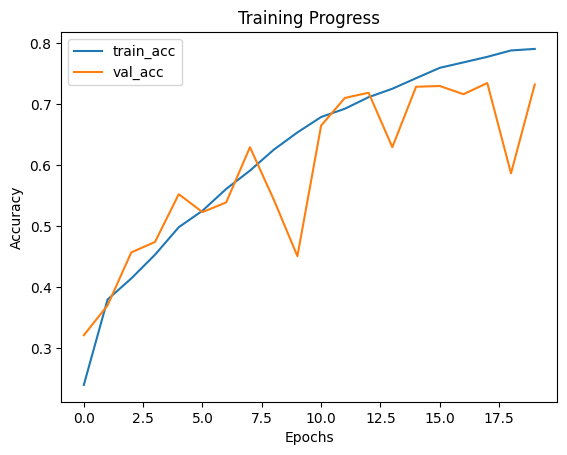

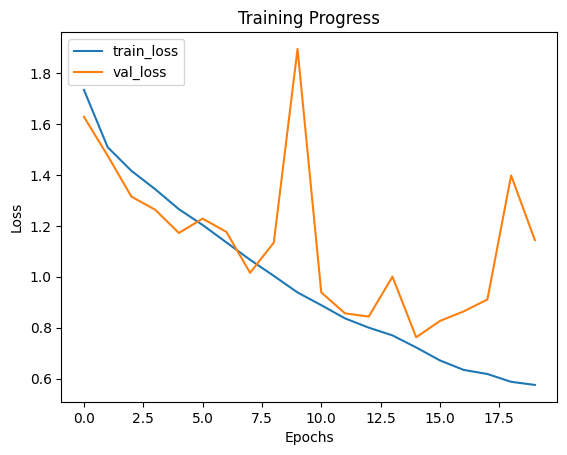

In [11]:
def plot_hist_acc(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("Training Progress")
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.legend(["train_acc", "val_acc"], loc="upper left")
    plt.show()
def plot_hist_loss(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("Training Progress")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend(["train_loss", "val_loss"], loc="upper left")
    plt.show()

plot_hist_acc(history)
plot_hist_loss(history)

**Prédictions**

In [12]:
predictions = (model_5.predict(x_test) > 0.5).astype("int32")
test_labels = np.concatenate([y for x,y in x_test], axis=0) 

import pandas as pd
pd.crosstab(test_labels, np.argmax(predictions, axis=1), margins=True, margins_name="Total" )

13/13 [==============================] - 2s 121ms/step


col_0    0    1    2    3    4    5  Total
row_0                                     
0       96    1    8   14    1    0    120
1        0  143    1    5    2    0    151
2        7    3   86   22   14    1    133
3       12   42    2   91    5    0    152
4       12    6    7   22   84    4    135
5        5   22    0    2    0   98    127
Total  132  217  104  156  106  103    818

### Modèle séquentiel Keras à 4 couches de convolution avec normalisation batch

In [6]:
model_bis = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3,3), padding="same"),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Conv2D(32, kernel_size=(3,3), padding="valid"),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.2, seed=235),
        layers.Conv2D(32, kernel_size=(3,3), padding="same"),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Conv2D(32, kernel_size=(3,3), padding="valid"),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.2, seed=235),
        layers.Flatten(),
        layers.Dropout(0.5, seed=235),
        layers.Dense(512),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Dense(6, activation="softmax"),
    ]
)
model_bis.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 400, 400, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 400, 400, 32)      128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 400, 400, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 398, 398, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 398, 398, 32)      128       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 398, 398, 32)     

**Apprentissage du modèle**

In [7]:
model_bis.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.RMSprop(learning_rate=1e-3), metrics=["accuracy"])
history=model_bis.fit(x_train, validation_data=(x_test), batch_size=64, epochs=20)

Epoch 1/20




113/113 [==============================] - 2022s 18s/step - loss: 1.3238 - accuracy: 0.5446 - val_loss: 2.1855 - val_accuracy: 0.3215
Epoch 2/20
113/113 [==============================] - 2557s 22s/step - loss: 0.6362 - accuracy: 0.7718 - val_loss: 3.2710 - val_accuracy: 0.2763
Epoch 3/20
113/113 [==============================] - 2869s 25s/step - loss: 0.2932 - accuracy: 0.9032 - val_loss: 2.3907 - val_accuracy: 0.3839
Epoch 4/20
113/113 [==============================] - 1776s 15s/step - loss: 0.1201 - accuracy: 0.9632 - val_loss: 2.9845 - val_accuracy: 0.3875
Epoch 5/20
113/113 [==============================] - 1450s 13s/step - loss: 0.0783 - accuracy: 0.9767 - val_loss: 5.1804 - val_accuracy: 0.2298
Epoch 6/20
113/113 [==============================] - 3131s 28s/step - loss: 0.0475 - accuracy: 0.9883 - val_loss: 5.7463 - val_accuracy: 0.2115
Epoch 7/20
113/113 [==============================] - 3125s 28s/step - loss: 0.0375 - accuracy: 0.9897 - val_loss: 2.9903 - val_accuracy: 0

Ce modèle n'améliore pas les performances de l'algorithme.

**Evaluation du modèle**

In [9]:
loss, acc = model_bis.evaluate(x_test, verbose=0)
print("Test loss: %.5f" % loss)
print("Test accuracy: %.2f%%" % (100.0 * acc))
print("Error rate: %.2f%%" % (100.0 * (1-acc)))

Test loss: 1.60987
Test accuracy: 61.61%
Error rate: 38.39%


**Visualisation des performances**

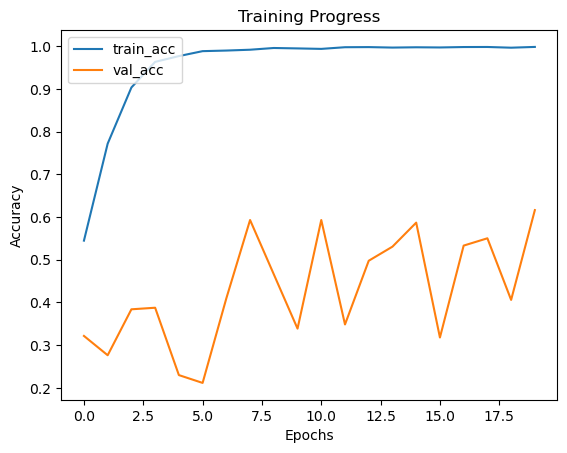

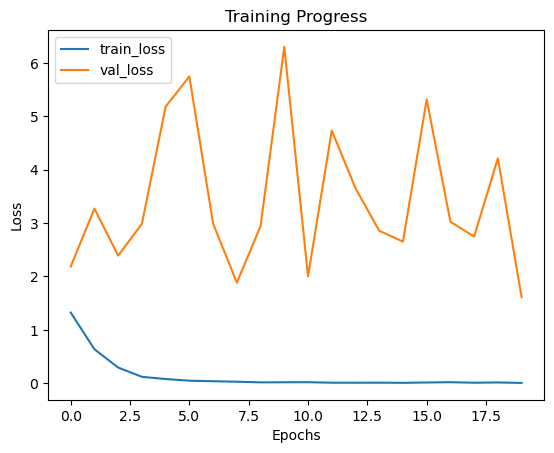

In [10]:
def plot_hist_acc(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("Training Progress")
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.legend(["train_acc", "val_acc"], loc="upper left")
    plt.show()
def plot_hist_loss(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("Training Progress")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend(["train_loss", "val_loss"], loc="upper left")
    plt.show()

plot_hist_acc(history)
plot_hist_loss(history)


**Prédictions**

In [12]:
predictions = (model_bis.predict(x_test) > 0.5).astype("int32")
test_labels = np.concatenate([y for x,y in x_test], axis=0) 

import pandas as pd
pd.crosstab(test_labels, np.argmax(predictions, axis=1), margins=True, margins_name="Total" )

13/13 [==============================] - 22s 2s/step


col_0    0   1    2   3    4   5  Total
row_0                                  
0      106   0    3   0   11   0    120
1       40  66   12   7   17   9    151
2        8   0   88   0   37   0    133
3       67   1   12  42   30   0    152
4        1   0   14   0  117   3    135
5       10   0   16   1   22  78    127
Total  232  67  145  50  234  90    818

### Modèle séquentiel Keras à 6 couches de convolution avec normalisation batch

In [ ]:
model_ter = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3,3), padding="same"),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Conv2D(64, kernel_size=(3,3), padding="valid"),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.2, seed=235),
        layers.Conv2D(128, kernel_size=(3,3), padding="same"),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Conv2D(128, kernel_size=(3,3), padding="valid"),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.2, seed=235),
        layers.Conv2D(256, kernel_size=(3,3), padding="same"),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Conv2D(256, kernel_size=(3,3), padding="valid"),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.2, seed=235),
        layers.Flatten(),
        layers.Dropout(0.5, seed=235),
        layers.Dense(512),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Dropout(0.5, seed=235),
        layers.Dense(512),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Dense(6, activation="softmax"),
    ]
)
model.summary()
        

**Aprentissage du modèle**

In [ ]:
model_ter.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.RMSprop(learning_rate=1e-3), metrics=["accuracy"])
history=model_ter.fit(x_train, validation_data=(x_test), batch_size=64, epochs=20)

Nous n'avons pas assez de puissance de calcul pour tester ce modèle.

## Augmentation de données

**Générateur de données**

In [13]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.15),
        layers.RandomZoom(0.15),
        layers.RandomTranslation(height_factor = 0.15, width_factor=0.15),
        layers.RandomHeight(0.15),
        layers.RandomWidth(0.15)
    ])

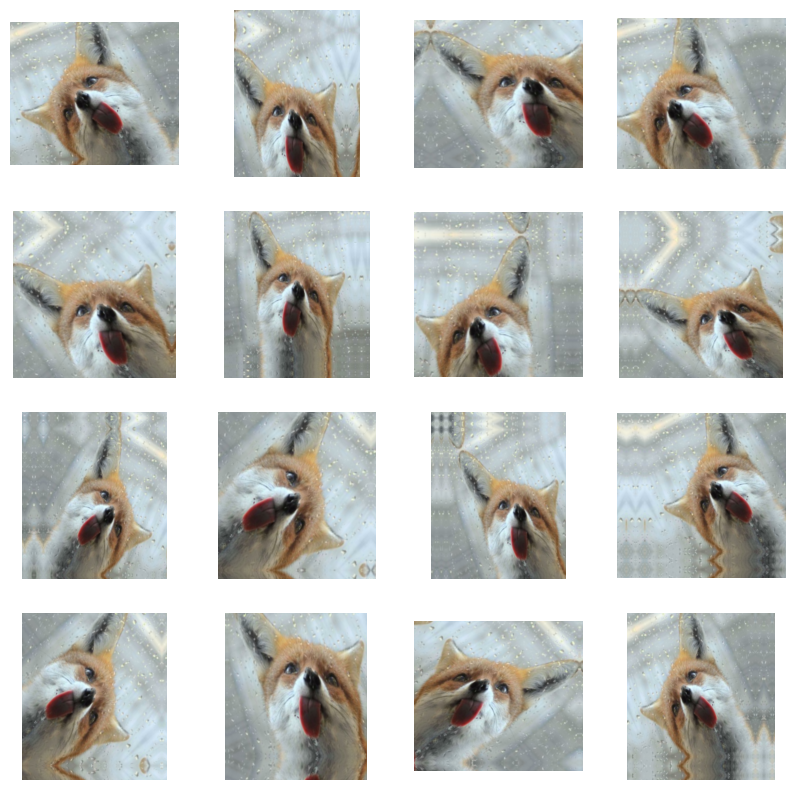

In [6]:
plt.figure(figsize=(10, 10))
for images, _ in x_train.take(1):
  for i in range(16):
    augmented_images = data_augmentation(images, training=True)
    ax = plt.subplot(4,4,i+1)
    plt.imshow(augmented_images[0].numpy().astype('uint8'))
    plt.axis('off')

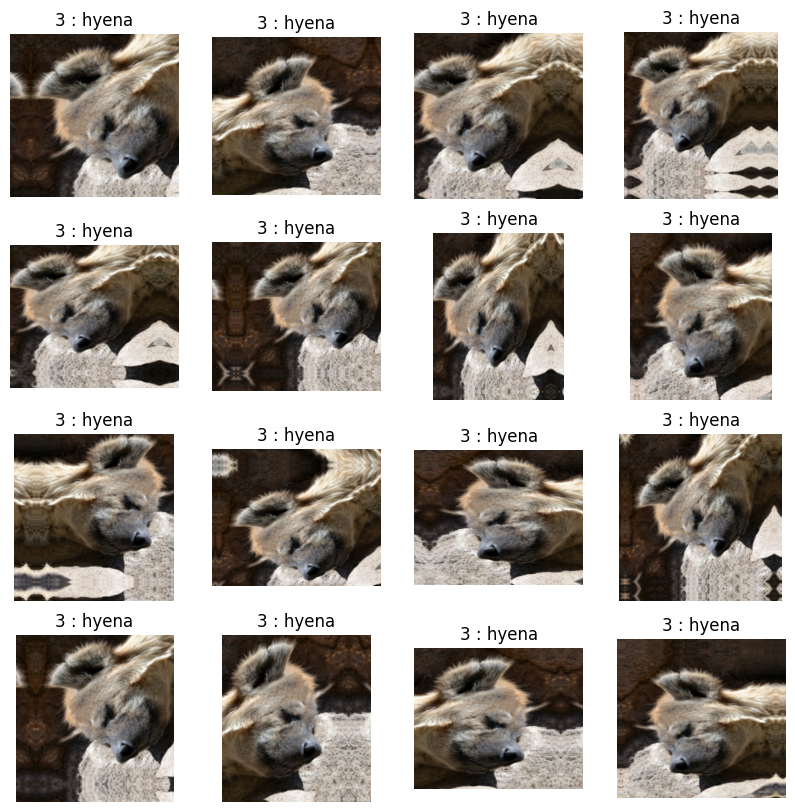

In [20]:
class_names = x_train.class_names
plt.figure(figsize=(10, 10))
# images du premier batch d'images
for images, labels in x_train.take(1):
    for i in range(16):
        augmented_images = data_augmentation(images, training=True)
        ax = plt.subplot(4,4,i+1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.title(str(int(labels[0]))+" : "+str(class_names[labels[0]]))
        plt.axis("off")

### Modèle séquentiel Keras à 2 couches de convolution avec dropout

**Création du modèle**

In [14]:
model_aug = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        data_augmentation,
        layers.Rescaling(1./255),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.GlobalAveragePooling2D(),
        layers.Dense(32, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(6, activation="softmax"),
    ]
)

model_aug.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, None, None, 3)     0         
                                                                 
 rescaling (Rescaling)       (None, None, None, 3)     0         
                                                                 
 conv2d_4 (Conv2D)           (None, None, None, 32)    896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, None, None, 32)    0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, None, None, 32)    9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, None, None, 32)    0         
 g2D)                                                 

Ici, nous avons beaucoup moins de paramètres.

**Apprentissage du modèle**

In [15]:
model_aug.compile(loss="sparse_categorical_crossentropy", optimizer = keras.optimizers.RMSprop(learning_rate = 1e-3), metrics=["accuracy"])
history = model_aug.fit(x_train, validation_data = (x_test), batch_size=64, epochs=20)

Epoch 1/20
113/113 [==============================] - 287s 3s/step - loss: 1.7781 - accuracy: 0.1966 - val_loss: 1.7556 - val_accuracy: 0.1919
Epoch 2/20
113/113 [==============================] - 268s 2s/step - loss: 1.7311 - accuracy: 0.2356 - val_loss: 1.7366 - val_accuracy: 0.2359
Epoch 3/20
113/113 [==============================] - 272s 2s/step - loss: 1.6911 - accuracy: 0.2808 - val_loss: 1.6907 - val_accuracy: 0.2579
Epoch 4/20
113/113 [==============================] - 275s 2s/step - loss: 1.6669 - accuracy: 0.2973 - val_loss: 1.7939 - val_accuracy: 0.2592
Epoch 5/20
113/113 [==============================] - 276s 2s/step - loss: 1.6516 - accuracy: 0.3049 - val_loss: 1.8372 - val_accuracy: 0.1883
Epoch 6/20
113/113 [==============================] - 281s 2s/step - loss: 1.6260 - accuracy: 0.3298 - val_loss: 1.7623 - val_accuracy: 0.2200
Epoch 7/20
113/113 [==============================] - 290s 3s/step - loss: 1.6022 - accuracy: 0.3454 - val_loss: 2.0452 - val_accuracy: 0.1956

Ce modèle non plus n'améliore pas les performances de notre alorithme

**Evaluation du modèle**

In [16]:
loss, acc = model_aug.evaluate(x_test, verbose=0)
print("Test loss: %.5f" % loss)
print("Test accuracy: %.2f%%" % (100.0 * acc))
print("Error rate: %.2f%%" % (100.0 * (1-acc)))

Test loss: 1.48193
Test accuracy: 36.92%
Error rate: 63.08%


**Visualisation des performances**

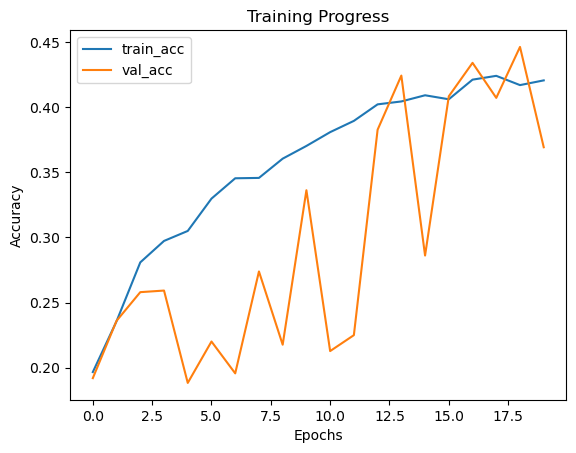

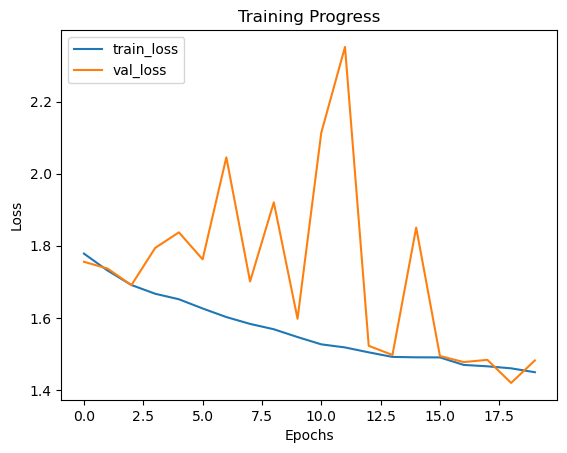

In [18]:
def plot_hist_acc(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("Training Progress")
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.legend(["train_acc", "val_acc"], loc="upper left")
    plt.show()
def plot_hist_loss(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("Training Progress")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend(["train_loss", "val_loss"], loc="upper left")
    plt.show()
    
plot_hist_acc(history)
plot_hist_loss(history)

**Prédiction**

In [19]:
predictions = (model_aug.predict(x_test) > 0.5).astype("int32")
test_labels = np.concatenate([y for x,y in x_test], axis=0) 

import pandas as pd
pd.crosstab(test_labels, np.argmax(predictions, axis=1), margins=True, margins_name="Total" )

13/13 [==============================] - 7s 475ms/step


col_0    0    1  2   4   5  Total
row_0                            
0      113    2  0   2   3    120
1       97   43  1   0  10    151
2      112   13  0   6   2    133
3      137   10  0   4   1    152
4      116    5  0   6   8    135
5       62   40  0   0  25    127
Total  637  113  1  18  49    818

### Modèle séquentiel Keras à 4 couches de convolution avec dropout

**CRéation du modèle**

In [20]:
model_aug = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        data_augmentation,
        layers.Rescaling(1./255),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.GlobalAveragePooling2D(),
        layers.Dense(32, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(6, activation="softmax"),
    ]
)

model_aug.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, None, None, 3)     0         
                                                                 
 rescaling_1 (Rescaling)     (None, None, None, 3)     0         
                                                                 
 conv2d_6 (Conv2D)           (None, None, None, 32)    896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, None, None, 32)    0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, None, None, 32)    9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, None, None, 32)    0         
 g2D)                                                 

**Aprentissage du modèle**

In [21]:
model_aug.compile(loss="sparse_categorical_crossentropy", optimizer = keras.optimizers.RMSprop(learning_rate = 1e-3), metrics=["accuracy"])
history = model_aug.fit(x_train, validation_data = (x_test), batch_size=64, epochs=20)

Epoch 1/20
113/113 [==============================] - 309s 3s/step - loss: 1.7745 - accuracy: 0.2016 - val_loss: 1.7344 - val_accuracy: 0.2274
Epoch 2/20
113/113 [==============================] - 314s 3s/step - loss: 1.6990 - accuracy: 0.2638 - val_loss: 1.6702 - val_accuracy: 0.2616
Epoch 3/20
113/113 [==============================] - 313s 3s/step - loss: 1.6475 - accuracy: 0.3190 - val_loss: 1.8777 - val_accuracy: 0.2421
Epoch 4/20
113/113 [==============================] - 309s 3s/step - loss: 1.5824 - accuracy: 0.3522 - val_loss: 1.7151 - val_accuracy: 0.3068
Epoch 5/20
113/113 [==============================] - 309s 3s/step - loss: 1.5512 - accuracy: 0.3801 - val_loss: 1.8153 - val_accuracy: 0.2726
Epoch 6/20
113/113 [==============================] - 322s 3s/step - loss: 1.5146 - accuracy: 0.3989 - val_loss: 2.0872 - val_accuracy: 0.2200
Epoch 7/20
113/113 [==============================] - 305s 3s/step - loss: 1.4842 - accuracy: 0.4116 - val_loss: 1.4278 - val_accuracy: 0.4756

**Evaluation du modèle**

In [22]:
loss, acc = model_aug.evaluate(x_test, verbose=0)
print("Test loss: %.5f" % loss)
print("Test accuracy: %.2f%%" % (100.0 * acc))
print("Error rate: %.2f%%" % (100.0 * (1-acc)))

Test loss: 1.14715
Test accuracy: 56.48%
Error rate: 43.52%


**Visualisation des performances**

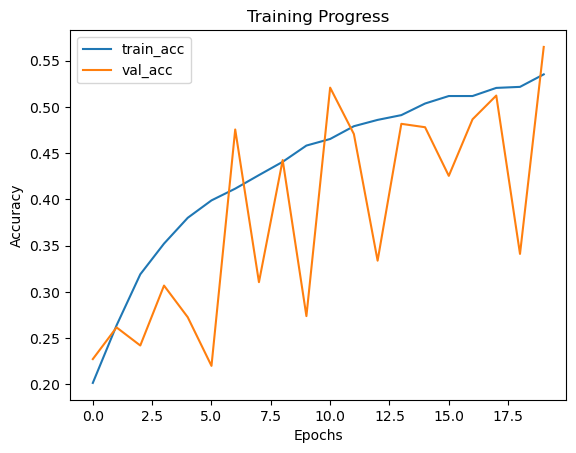

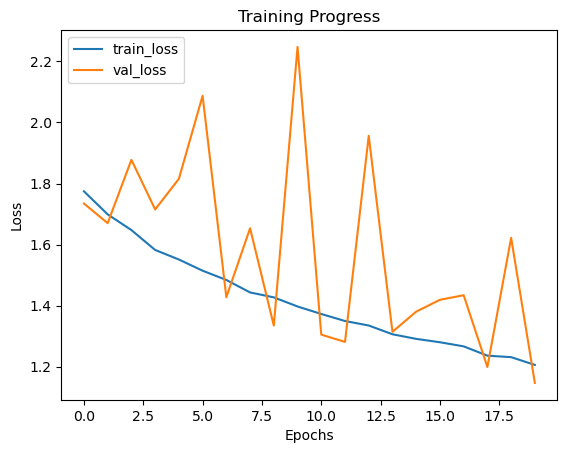

In [23]:
def plot_hist_acc(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("Training Progress")
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.legend(["train_acc", "val_acc"], loc="upper left")
    plt.show()
def plot_hist_loss(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("Training Progress")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend(["train_loss", "val_loss"], loc="upper left")
    plt.show()
    
plot_hist_acc(history)
plot_hist_loss(history)

**Prédictions**

In [24]:
predictions = (model_aug.predict(x_test) > 0.5).astype("int32")
test_labels = np.concatenate([y for x,y in x_test], axis=0) 

import pandas as pd
pd.crosstab(test_labels, np.argmax(predictions, axis=1), margins=True, margins_name="Total" )

13/13 [==============================] - 8s 523ms/step


col_0    0    1   2  3   4    5  Total
row_0                                 
0      114    0   1  0   1    4    120
1       29  116   0  0   2    4    151
2       83    1  33  0   1   15    133
3      107   17   4  1  19    4    152
4       93    0  14  0  19    9    135
5       24    1   0  0   0  102    127
Total  450  135  52  1  42  138    818

## Apprentissage par transfert

**Modèle préentraîné**

In [25]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

# Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False)
base_model.trainable = False
base_model.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

In [27]:
# model based on an intermediate layer of VGG16
intermediate_layer_model = keras.Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

**Création du modèle**

In [28]:
model_transfert = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        data_augmentation,
        keras.layers.Lambda(keras.applications.vgg16.preprocess_input),
        intermediate_layer_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(6, activation="softmax"),
    ]
)

model_transfert.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, None, None, 3)     0         
                                                                 
 lambda_1 (Lambda)           (None, None, None, 3)     0         
                                                                 
 model (Functional)          (None, None, None, 512)   7635264   
                                                                 
 global_average_pooling2d_2  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 128)               65664     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                      

**Aprentissage du modèle**

In [29]:
model_transfert.compile(loss="sparse_categorical_crossentropy", optimizer = keras.optimizers.RMSprop(learning_rate = 1e-3), metrics=["accuracy"])
history = model_aug.fit(x_train, validation_data = (x_test), batch_size=64, epochs=20)

Epoch 1/20


113/113 [==============================] - 297s 3s/step - loss: 1.1915 - accuracy: 0.5393 - val_loss: 1.1962 - val_accuracy: 0.5379
Epoch 2/20
113/113 [==============================] - 303s 3s/step - loss: 1.1872 - accuracy: 0.5474 - val_loss: 1.9485 - val_accuracy: 0.3704
Epoch 3/20
113/113 [==============================] - 414s 4s/step - loss: 1.1985 - accuracy: 0.5468 - val_loss: 1.3392 - val_accuracy: 0.4976
Epoch 4/20
113/113 [==============================] - 444s 4s/step - loss: 1.1651 - accuracy: 0.5540 - val_loss: 1.1600 - val_accuracy: 0.5770
Epoch 5/20
113/113 [==============================] - 428s 4s/step - loss: 1.1583 - accuracy: 0.5608 - val_loss: 1.4208 - val_accuracy: 0.4780
Epoch 6/20
113/113 [==============================] - 417s 4s/step - loss: 1.1439 - accuracy: 0.5676 - val_loss: 1.1127 - val_accuracy: 0.5758
Epoch 7/20
113/113 [==============================] - 412s 4s/step - loss: 1.1454 - accuracy: 0.5697 - val_loss: 1.1986 - val_accuracy: 0.5416
Epoch 8/20

65,04% d'accuracy

**Evaluation du modèle**

In [30]:
loss, acc = model_transfert.evaluate(x_test, verbose=0)
print("Test loss: %.5f" % loss)
print("Test accuracy: %.2f%%" % (100.0 * acc))
print("Error rate: %.2f%%" % (100.0 * (1-acc)))

Test loss: 61.85311
Test accuracy: 15.40%
Error rate: 84.60%


**Visualisation des performances**

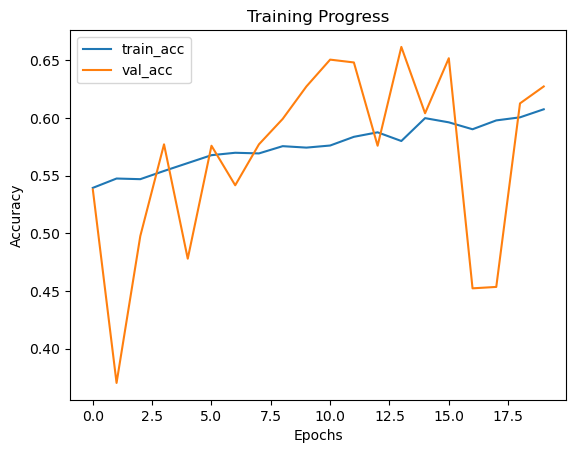

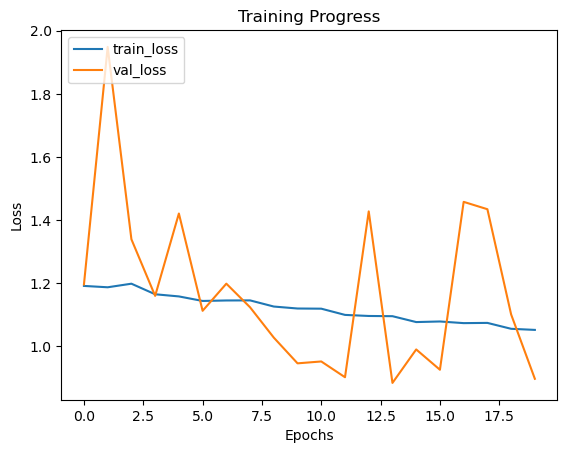

In [31]:
def plot_hist_acc(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("Training Progress")
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.legend(["train_acc", "val_acc"], loc="upper left")
    plt.show()
def plot_hist_loss(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("Training Progress")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend(["train_loss", "val_loss"], loc="upper left")
    plt.show()

plot_hist_acc(history)
plot_hist_loss(history)

**Prédiction**

In [33]:
predictions = (model_transfert.predict(x_test) > 0.5).astype("int32")
test_labels = np.concatenate([y for x,y in x_test], axis=0) 

import pandas as pd
pd.crosstab(test_labels, np.argmax(predictions, axis=1), margins=True, margins_name="Total" )

13/13 [==============================] - 223s 17s/step


col_0    0    3  4  Total
row_0                    
0       92   28  0    120
1      117   34  0    151
2       91   39  3    133
3      118   34  0    152
4      113   22  0    135
5       90   37  0    127
Total  621  194  3    818

## Affichage des 20 premières image mal classées en utilisant le modèle retenu

**Erreur de prédiction dub modèle retenue**

In [87]:
pred = list()
for liste in predictions:
    for i in range(5):
        if liste[i] == 1:
            pred.append(i)

errors = list()
for i in range(100):
    if test_labels[i] != pred[i]:
        errors.append(i)
len(errors)


40

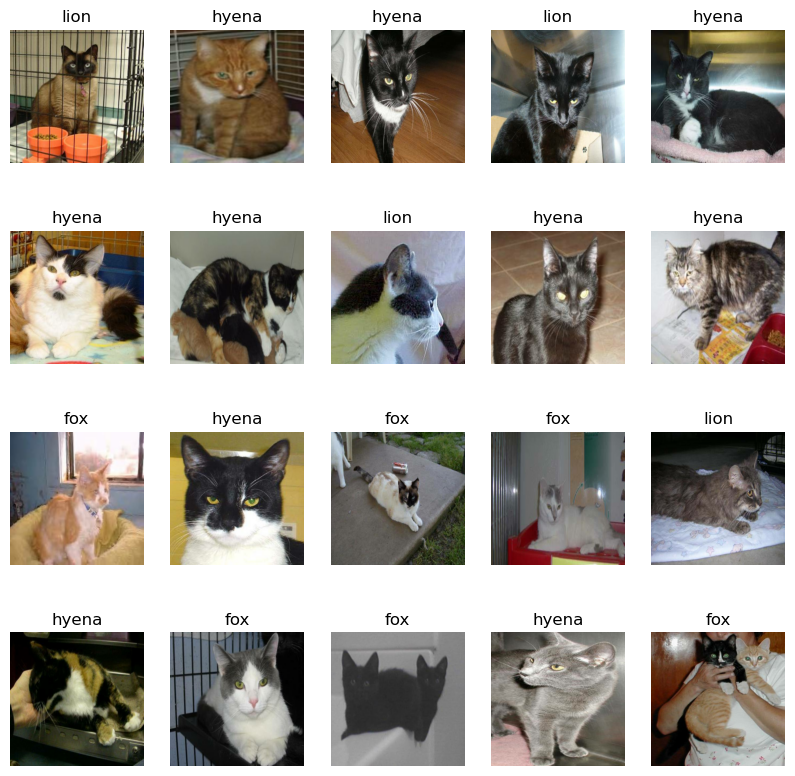

In [98]:
class_names = x_test.class_names

plt.figure(figsize=(10, 10))
#images du premier batch d'images
for images, labels in x_test.take(1):
    for i, index in enumerate(errors[:20]):
        ax = plt.subplot(4, 5, i + 1)
        plt.imshow(X = images[index].numpy().astype("uint8"))
        plt.title(str(class_names[pred[index]]))
        plt.axis("off")